## <B>Libraries Loading<B>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## <B>Data Preparing<B>

In [97]:
# Loading Data
path = "../data/raw/Covid_19 Dataset.csv"
df = pd.read_csv(path)

In [98]:
df.drop(["Unnamed: 0", "time"], axis=1, inplace=True)

In [99]:
# Drop null values
cols = ['continent']
df = df.dropna(subset=cols)

In [100]:
# Replace numerical null values with mean
for col in df.select_dtypes(include='number'):
    df[col] = df[col].fillna(df[col].mean())

In [101]:
# Convert day in to datetime datatype
df['day'] = pd.to_datetime(df['day'], format='%Y-%m-%d', errors='coerce')

In [102]:
# Convert total_cases in to float64 datatype
df['total_cases'] = df['total_cases'].astype('float64')

In [103]:
# Export the processed dataset
df.to_csv('../data/processed/Covid_Processed.csv')

## <B>Exploratory Data Analysis<B>

In [104]:
# Setting global font
plt.rcParams['font.family'] = 'serif'

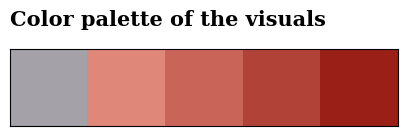

In [105]:
# Color palette
colors = [
    "#a4a2a8", "#df8879",
    "#c86558", "#b04238", "#991f17"
]

# Spines
spines = ['top', 'bottom', 'left', 'right']

# Show palette
sns.palplot(colors)
plt.title(
    "Color palette of the visuals",
    loc="left",
    fontsize=15,
    fontweight='bold',
    y=1.2
)

plt.tick_params(which = u'both', length=0)
plt.show()


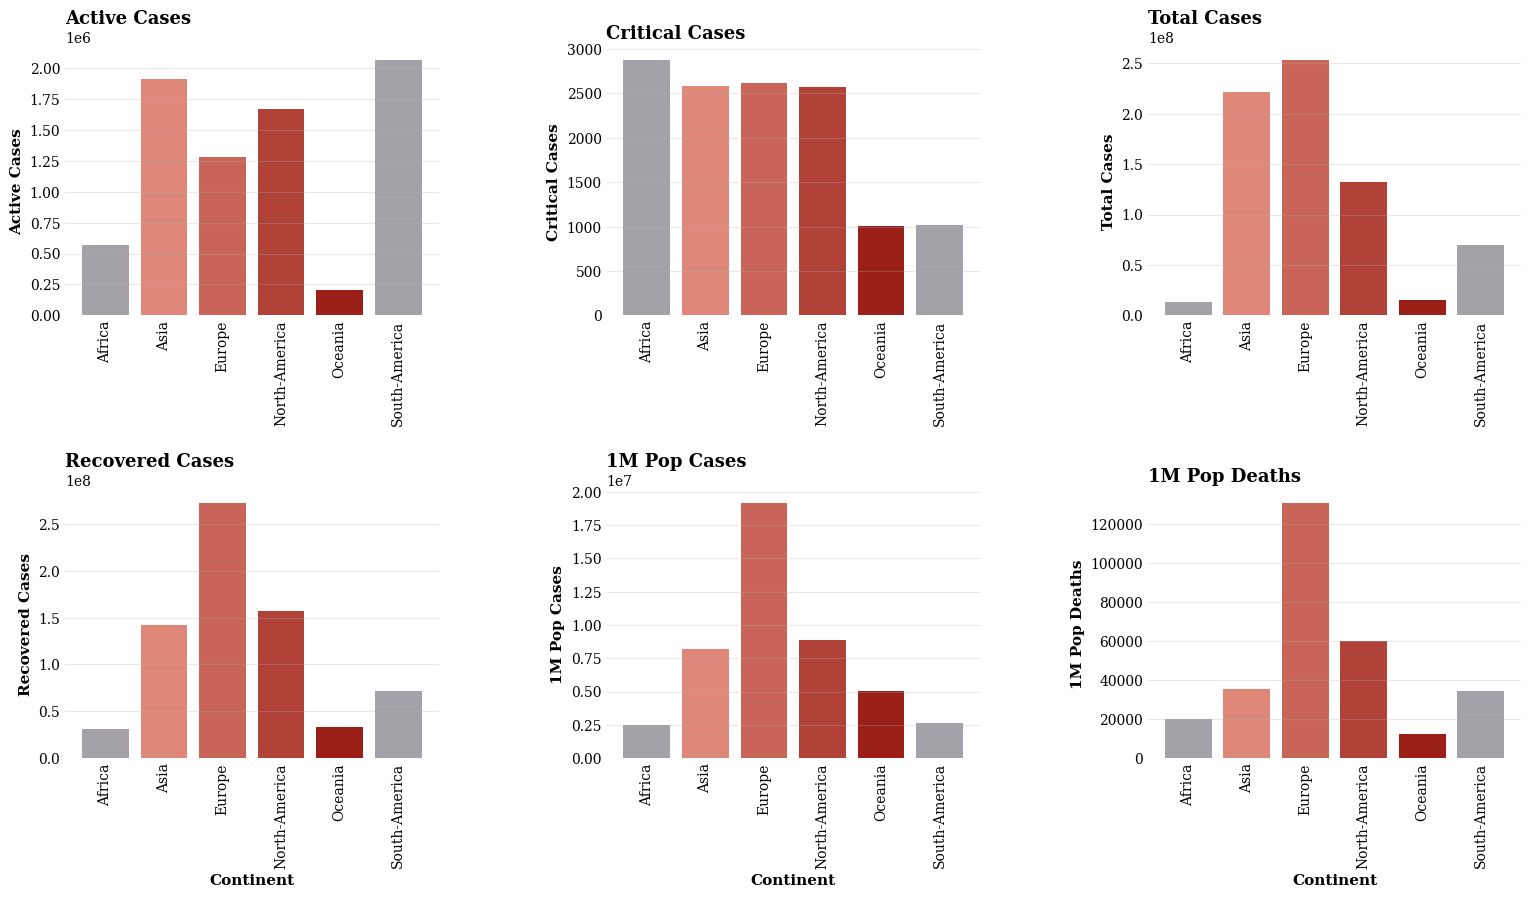

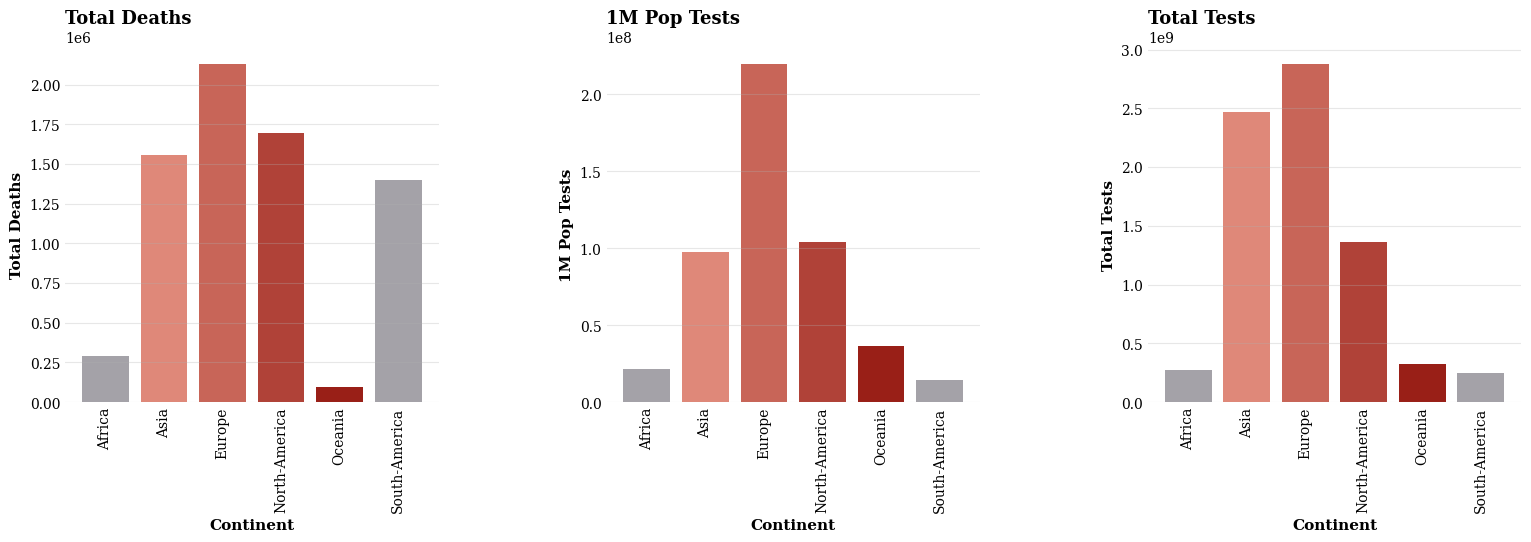

In [106]:
# Color palette
colors = [
    "#a4a2a8", "#df8879",
    "#c86558", "#b04238", "#991f17"
]

cols = [
    "active_cases", "critical_cases", "total_cases", "recovered_cases",
    "1M_pop_cases", "1M_pop_deaths", "total_deaths", "1M_pop_tests", "total_tests"
]

fig_splits = [cols[:6], cols[6:]]

spines = ['top', 'right', 'left', 'bottom']

for fig_cols in fig_splits:
    n = len(fig_cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(16, 4.5 * nrows)
    )

    axes = axes.flatten()

    for ax, col in zip(axes, fig_cols):
        agg = df.groupby("continent")[col].sum()

        ax.bar(
            agg.index,
            agg.values,
            color=colors[:len(agg)],
            edgecolor='none'
        )

        ax.set_title(
            col.replace("_", " ").title(),
            fontsize=13,
            fontweight='bold',
            loc='left'
        )

        ax.set_ylabel(
            col.replace("_", " ").title(),
            fontsize=11,
            fontweight='bold'
        )

        ax.tick_params(axis="x", rotation=90, length=0)
        ax.tick_params(axis="y", length=0)

        for s in spines:
            ax.spines[s].set_visible(False)

        ax.grid(axis='y', alpha=0.3)

    # Remove unused axes
    for ax in axes[n:]:
        ax.remove()

    # X-label only on bottom row
    for ax in axes[-ncols:]:
        ax.set_xlabel("Continent", fontsize=11, fontweight='bold')

    # ⭐ Proper margin control (key part)
    plt.subplots_adjust(
        hspace=0.65,   # vertical space between rows
        wspace=0.45,   # horizontal space between columns
        left=0.07,
        right=0.98,
        top=0.93,
        bottom=0.14
    )

    plt.show()


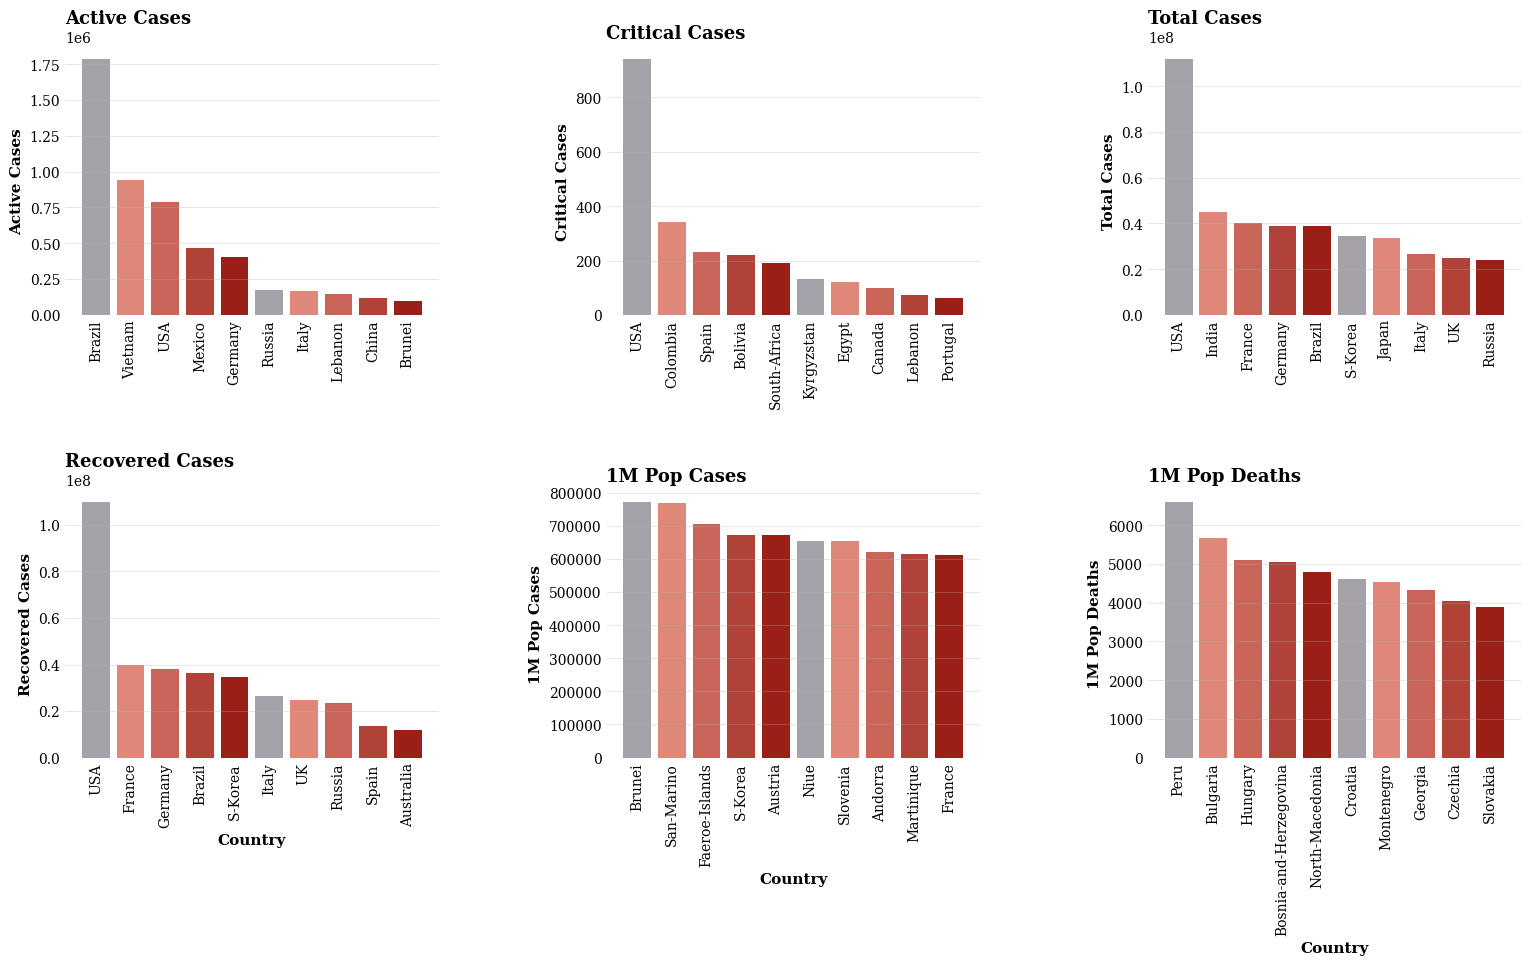

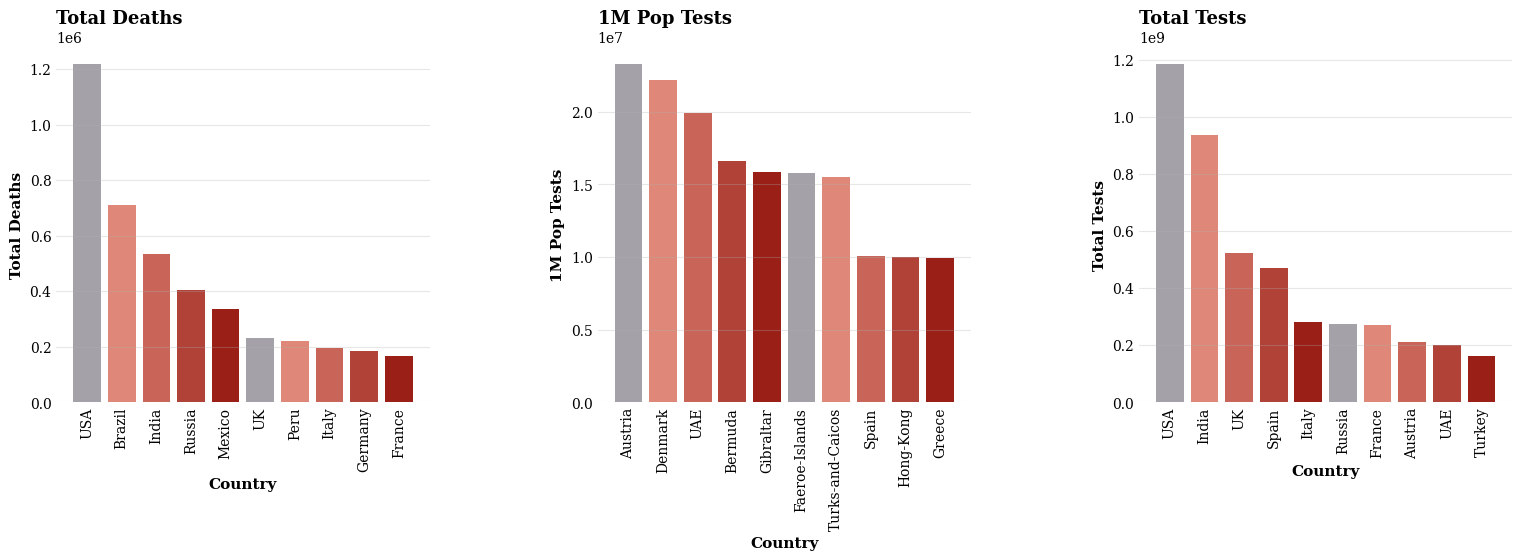

In [107]:
# Color palette
colors = [
    "#a4a2a8", "#df8879",
    "#c86558", "#b04238", "#991f17"
]

cols = [
    "active_cases", "critical_cases", "total_cases", "recovered_cases",
    "1M_pop_cases", "1M_pop_deaths", "total_deaths", "1M_pop_tests", "total_tests"
]

fig_splits = [cols[:6], cols[6:]]

for fig_cols in fig_splits:
    n = len(fig_cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(16, 4.5 * nrows)
    )

    axes = axes.flatten()

    for ax, col in zip(axes, fig_cols):
        agg = (
            df.groupby("country")[col]
            .sum()
            .sort_values(ascending=False)
            .head(10)
        )

        # Cycle colors across bars
        bar_colors = colors * (len(agg) // len(colors) + 1)

        ax.bar(
            agg.index,
            agg.values,
            color=bar_colors[:len(agg)],
            edgecolor='none'
        )

        ax.set_title(
            col.replace("_", " ").title(),
            fontsize=13,
            fontweight='bold',
            loc='left'
        )

        ax.set_ylabel(
            col.replace("_", " ").title(),
            fontsize=11,
            fontweight='bold'
        )

        for s in spines:
            ax.spines[s].set_visible(False)

        ax.grid(axis='y', alpha=0.3)

        ax.tick_params(axis="x", rotation=90, length=0)
        ax.tick_params(axis="y", length=0)

    # Remove unused axes
    for ax in axes[n:]:
        ax.remove()

    # X-label only on bottom row
    for ax in axes[-ncols:]:
        ax.set_xlabel("Country", fontsize=11, fontweight='bold')

    # Margins
    plt.subplots_adjust(
        hspace=0.65,
        wspace=0.45,
        left=0.07,
        right=0.98,
        top=0.93,
        bottom=0.14
    )

    plt.show()


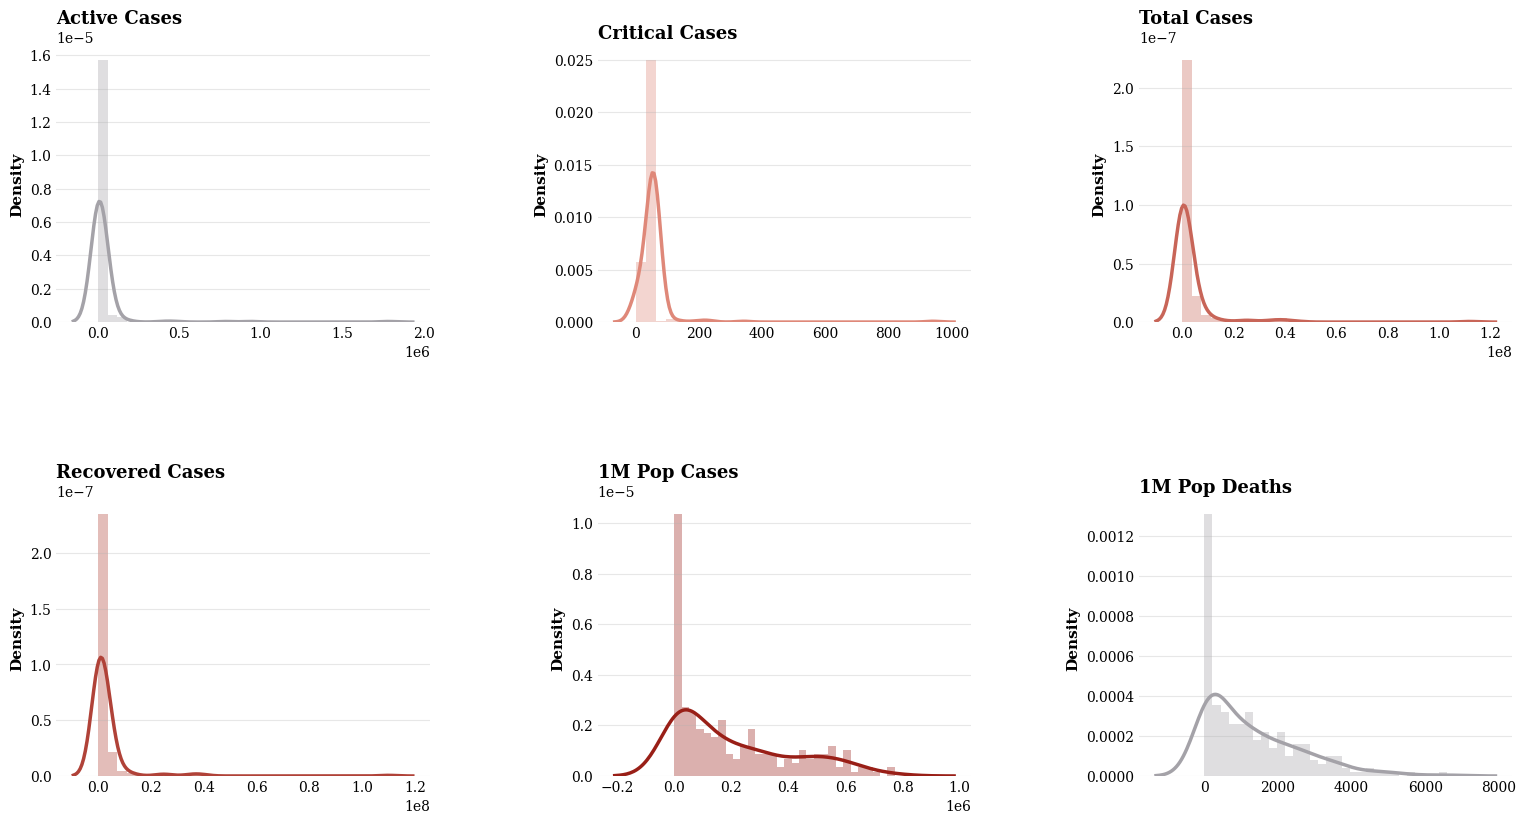

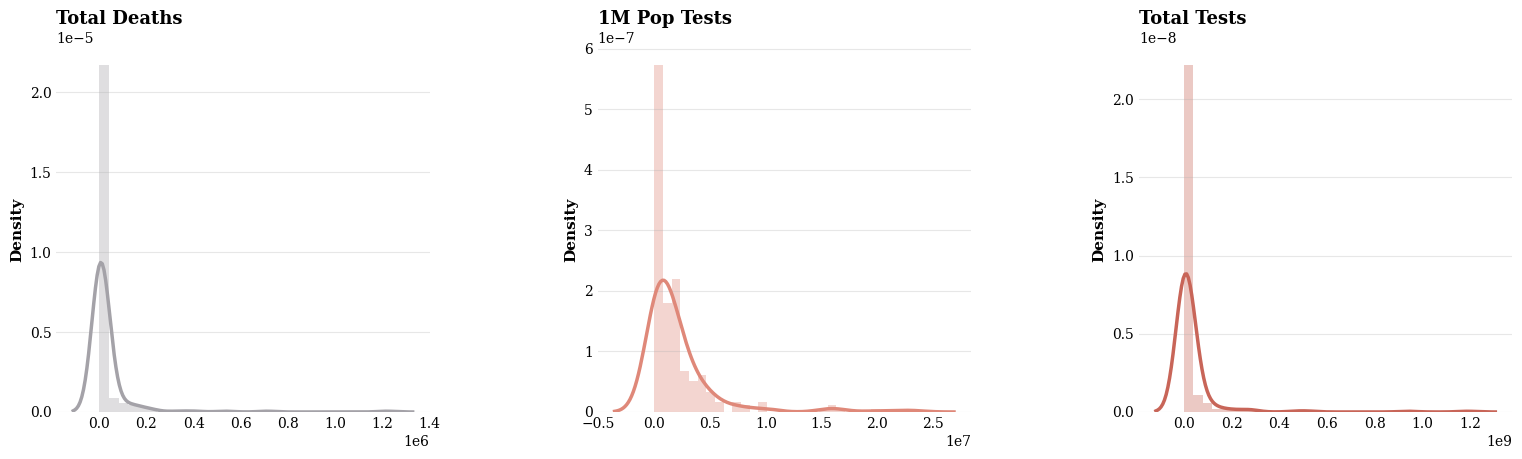

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Color palette
colors = [
    "#a4a2a8", "#df8879",
    "#c86558", "#b04238", "#991f17"
]

cols = [
    "active_cases", "critical_cases", "total_cases", "recovered_cases",
    "1M_pop_cases", "1M_pop_deaths", "total_deaths", "1M_pop_tests", "total_tests"
]

fig_splits = [cols[:6], cols[6:]]

spines = ['top', 'right', 'left', 'bottom']

for fig_cols in fig_splits:
    n = len(fig_cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(16, 4.5 * nrows)
    )

    axes = axes.flatten()

    for i, (ax, col) in enumerate(zip(axes, fig_cols)):
        data = df[col].dropna()

        # Histogram
        sns.histplot(
            data,
            bins=30,
            stat="density",
            color=colors[i % len(colors)],
            alpha=0.35,
            ax=ax,
            edgecolor='none'
        )

        # KDE line (distribution curve)
        sns.kdeplot(
            data,
            color=colors[i % len(colors)],
            linewidth=2.5,
            ax=ax
        )

        ax.set_title(
            col.replace("_", " ").title(),
            fontsize=13,
            fontweight='bold',
            loc='left'
        )

        ax.set_xlabel("")
        ax.set_ylabel("Density", fontsize=11, fontweight='bold')

        ax.tick_params(axis='both', length=0)

        for s in spines:
            ax.spines[s].set_visible(False)

        ax.grid(axis='y', alpha=0.3)

    # Remove unused axes
    for ax in axes[n:]:
        ax.remove()

    # Margins & spacing
    plt.subplots_adjust(
        hspace=0.65,
        wspace=0.45,
        left=0.07,
        right=0.98,
        top=0.93,
        bottom=0.12
    )

    plt.show()


### <B>Specific Domain Analysis<B>

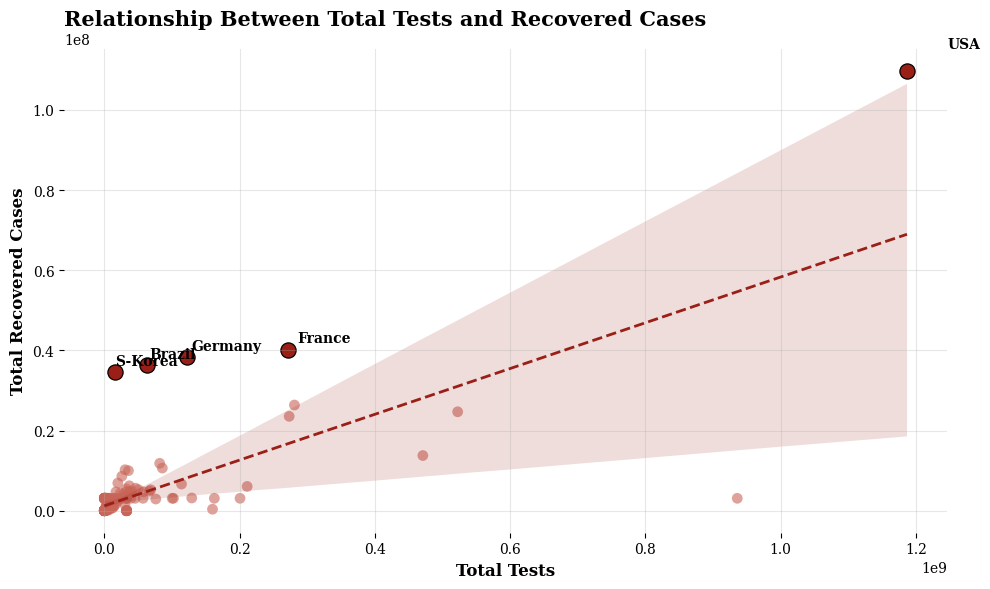

In [115]:
# Color palette
colors = ["#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]

# Prepare raw data (country-level)
plot_df = df[["country", "total_tests", "recovered_cases"]].dropna()

# Pick top 5 countries by recovered cases to highlight
top_countries = plot_df.sort_values("recovered_cases", ascending=False).head(5)

plt.figure(figsize=(10, 6))

# Scatter plot for all countries
sns.scatterplot(
    data=plot_df,
    x="total_tests",
    y="recovered_cases",
    color=colors[2],  # general points
    s=60,
    alpha=0.6,
    edgecolor="none"
)

# Highlight top countries
sns.scatterplot(
    data=top_countries,
    x="total_tests",
    y="recovered_cases",
    color=colors[-1],  # highlight color
    s=120,
    edgecolor="black"
)

# Regression line (overall trend)
sns.regplot(
    data=plot_df,
    x="total_tests",
    y="recovered_cases",
    scatter=False,
    color=colors[-1],
    line_kws={"linewidth": 2, "linestyle":"--"}
)

# Annotate highlighted countries
for i, row in top_countries.iterrows():
    plt.text(
        row["total_tests"] * 1.05,  # slight x offset
        row["recovered_cases"] * 1.05, # slight y offset
        row["country"],
        fontsize=10,
        fontweight="bold"
    )

# Titles and labels
plt.title(
    "Relationship Between Total Tests and Recovered Cases",
    loc="left",
    fontsize=15,
    fontweight="bold"
)
plt.xlabel("Total Tests", fontsize=12, fontweight="bold")
plt.ylabel("Total Recovered Cases", fontsize=12, fontweight="bold")

# Clean spines
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

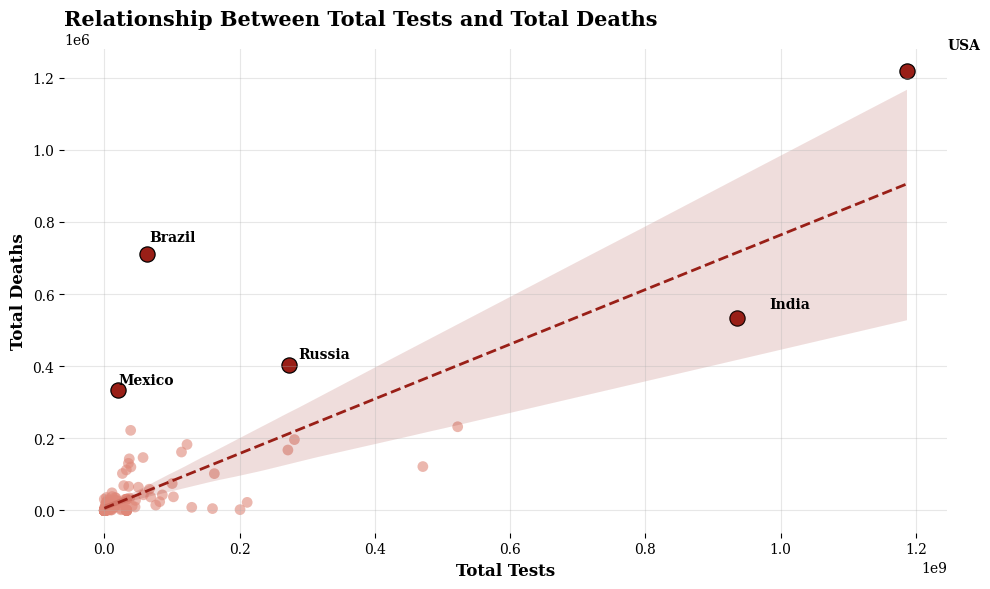

In [114]:
# Color palette
colors = ["#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]

# Prepare raw data (country-level)
plot_df = df[["country", "total_tests", "total_deaths"]].dropna()

# Pick top 5 countries by total deaths to highlight
top_countries = plot_df.sort_values("total_deaths", ascending=False).head(5)

plt.figure(figsize=(10, 6))

# Scatter plot for all countries
sns.scatterplot(
    data=plot_df,
    x="total_tests",
    y="total_deaths",
    color=colors[1],  # general points
    s=60,
    alpha=0.6,
    edgecolor="none"
)

# Highlight top countries
sns.scatterplot(
    data=top_countries,
    x="total_tests",
    y="total_deaths",
    color=colors[-1],  # highlight color
    s=120,
    edgecolor="black"
)

# Add regression line (trend)
sns.regplot(
    data=plot_df,
    x="total_tests",
    y="total_deaths",
    scatter=False,
    color=colors[-1],
    line_kws={"linewidth": 2, "linestyle":"--"}
)

# Annotate highlighted countries
for i, row in top_countries.iterrows():
    plt.text(
        row["total_tests"] * 1.05,  # slight x offset
        row["total_deaths"] * 1.05, # slight y offset
        row["country"],
        fontsize=10,
        fontweight="bold"
    )

# Titles and labels
plt.title(
    "Relationship Between Total Tests and Total Deaths",
    loc="left",
    fontsize=15,
    fontweight="bold"
)
plt.xlabel("Total Tests", fontsize=12, fontweight="bold")
plt.ylabel("Total Deaths", fontsize=12, fontweight="bold")

# Clean spines
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

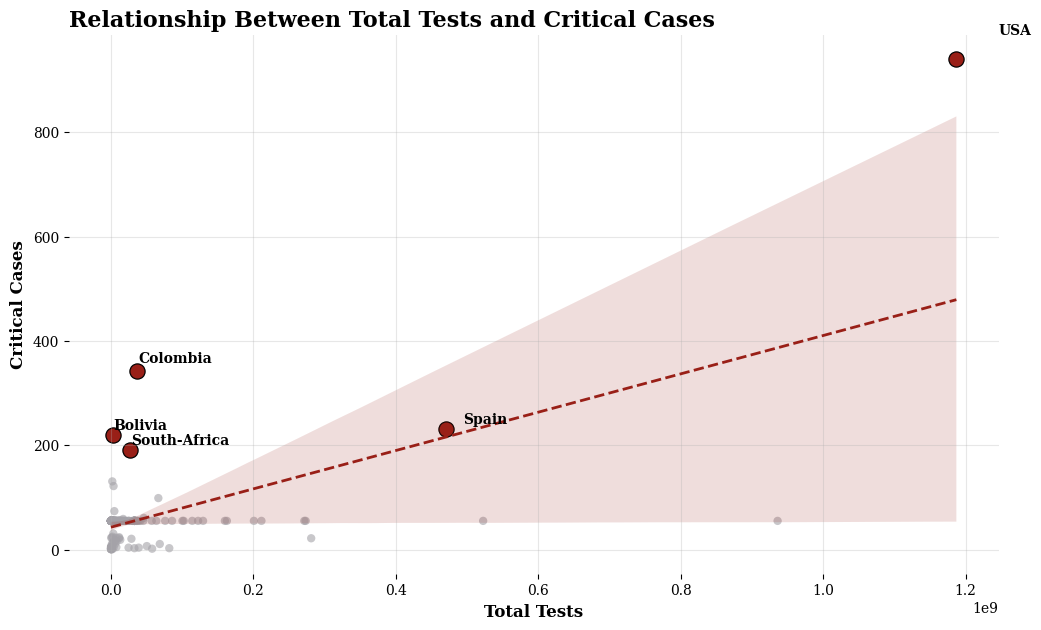

In [113]:
# Color palette
colors = ["#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]

# Select top 5 countries by critical cases
top_critical_countries = df.sort_values("critical_cases", ascending=False).head(5)["country"]

# Create the plot
plt.figure(figsize=(12, 7))

# Scatter plot for all countries
sns.scatterplot(
    data=df,
    x="total_tests",
    y="critical_cases",
    color=colors[0],
    alpha=0.6,
    edgecolor="none"
)

# Highlight the top 5 countries with the most critical cases
sns.scatterplot(
    data=df[df["country"].isin(top_critical_countries)],
    x="total_tests",
    y="critical_cases",
    color=colors[-1],
    s=120,
    edgecolor="black"
)

# Regression line (overall trend)
sns.regplot(
    data=df,
    x="total_tests",
    y="critical_cases",
    scatter=False,
    color="#991f17",
    line_kws={"linewidth":2, "linestyle":"--"}
)

# Titles and labels
plt.title(
    "Relationship Between Total Tests and Critical Cases",
    loc="left",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Total Tests", fontsize=12, fontweight="bold")
plt.ylabel("Critical Cases", fontsize=12, fontweight="bold")

# Label the top 5 critical cases countries
for i, row in df[df["country"].isin(top_critical_countries)].iterrows():
    plt.text(
        row["total_tests"] * 1.05,  # slight offset in X
        row["critical_cases"] * 1.05, # slight offset in Y
        row["country"],
        fontsize=10,
        fontweight="bold"
    )

# Remove spines for cleaner look
for spine in ["top", "right", "left", "bottom"]:
    plt.gca().spines[spine].set_visible(False)

plt.grid(alpha=0.3, which="both")  # light grid
plt.show()

## <B>Conclusion<B>

In [117]:
# Summary statistics (numerical columns)
print(df.describe())

         population                  day  active_cases  critical_cases  \
count  2.290000e+02                  229  2.290000e+02      229.000000   
mean   3.469404e+07  2025-07-28 00:00:00  3.360282e+04       55.326923   
min    7.990000e+02  2025-07-28 00:00:00  0.000000e+00        1.000000   
25%    4.454310e+05  2025-07-28 00:00:00  7.300000e+01       55.326923   
50%    5.797805e+06  2025-07-28 00:00:00  1.299000e+03       55.326923   
75%    2.210284e+07  2025-07-28 00:00:00  3.360282e+04       55.326923   
max    1.448471e+09  2025-07-28 00:00:00  1.783377e+06      940.000000   
std    1.386374e+08                  NaN  1.481979e+05       67.594101   

        total_cases  recovered_cases   1M_pop_cases  1M_pop_deaths  \
count  2.290000e+02     2.290000e+02     229.000000     229.000000   
mean   3.077525e+06     3.097055e+06  202950.253275    1277.348214   
min    1.000000e+01     2.000000e+00      16.000000       2.000000   
25%    2.733400e+04     4.127800e+04   18885.000000  

#### Color palette selection justification:
- Red colors used to indicate the danger for the COVID out break.
- Gray color used to make a significant contrast with red values.

#### Continent based analysis:
- Europe considered the highest continent in total cases, recovered cases, total cases and total death too. This highlights the good follow up of COVID outbreak. 
- For critical and active cases we see some in explainable variations.

#### Country based analysis:
 - We recognize USA as a significantly highest country in critical cases, total cases, and recovered cases. This somehow different from analysis of continent based analysis. This highlights USA is the most country of north america continent in critical cases, total cases, and recovered cases. But, other countries in north america is significantly lower.
 - Brazil is the highest country in the count of active cases.
 - Total cases differs in total cases and total death count due to population differences and tests frequency rates .

#### Values Distribution
 - We recognize no significant results of values distribution for different parameters